In [23]:
# Import Packages
from ml import *

In [24]:
# Load data
data = pd.read_csv('/datc/parcel/notebooks/data/postnl/20200904_sample.csv', index_col=0, parse_dates=[1])

In [25]:
data

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag
0,2015-01-02,klant_1,8421,0
1,2015-01-02,klant_2,4547,0
2,2015-01-02,klant_3,13,0
3,2015-01-02,klant_4,0,0
4,2015-01-02,klant_5,0,0
...,...,...,...,...
9835,2019-06-29,klant_2,0,24917
9836,2019-06-29,klant_3,0,20
9837,2019-06-29,klant_4,0,1
9838,2019-06-29,klant_5,0,116


In [26]:
cust_filter = data['cust_id'] == 'klant_3'
date_filter = data['procesdag'].dt.dayofweek <= 4
data = data.where(date_filter & cust_filter).dropna()

In [27]:
data.procesdag = pd.to_datetime(data.procesdag)

In [28]:
sec = ((data.procesdag).astype(int) / 1e9).astype(int)

In [29]:
min((sec - sec.shift(1)).dropna())
max((sec - sec.shift(1)).dropna())

259200.0

In [30]:
y = data.aantal_pakketten_volgende_dag
X = data[['procesdag', 'aantal_pakketten']]

In [31]:
train_X = X[:7000]
valid_X = X[7000:]
train_y = y[:7000]
valid_y = y[7000:]

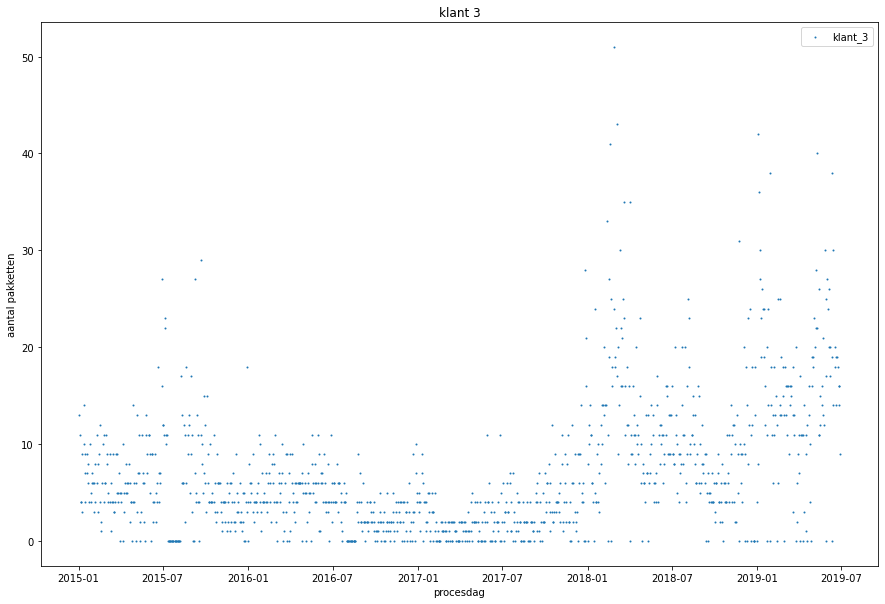

In [32]:
train_X2 = train_X.where(data['cust_id'] == 'klant_3').dropna()
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(train_X2['procesdag'], train_X2.aantal_pakketten, label='klant_3', s=1)

plt.ylabel('aantal pakketten')
plt.xlabel('procesdag')
plt.title('klant 3')
plt.legend();

In [33]:
train_X2

,procesdag,aantal_pakketten
2,2015-01-02,13.0
20,2015-01-05,11.0
26,2015-01-06,4.0
32,2015-01-07,4.0
38,2015-01-08,9.0
...,...,...
9806,2019-06-24,18.0
9812,2019-06-25,16.0
9818,2019-06-26,16.0
9824,2019-06-27,14.0
